In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import tree

In [2]:
# Loading the dataset

In [3]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EDA

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
# there is no null value present in the the data set

In [7]:
# checking for the duplicated values
df.duplicated().sum()

0

In [8]:
#there is no duplicated value present in the dataset

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### converting the categorical column into the numerical column

In [10]:
df=pd.get_dummies(df,columns=['Urban','US'])

In [11]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [12]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,3,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,3,38,13,0,1,1,0


#### separating the target and independent variable

In [13]:
x=df.iloc[:,1:]
y=df['Sales']

#### splitting the data in training and testing part

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [15]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [16]:
ypred=dt.predict(xtest)

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(ytest,ypred)

0.2264402886154958

In [19]:
print('Training accuracy',dt.score(xtrain,ytrain)) 
print('Testing Accuracy',dt.score(xtest,ytest))

Training accuracy 1.0
Testing Accuracy 0.2264402886154958


In [20]:
# so there is a massive difference between training and testing accuracy so we can do a
#hyperparameter tunig

### Hyperparameter Tuning

In [56]:
param={
    'criterion':['squared_error','absolute_error'],
    'splitter':['random','best'],
    'max_depth':[2,3,4,5,6,7,8,9]
}

In [57]:
grid=GridSearchCV(DecisionTreeRegressor(),param_grid=param,verbose=1)

In [58]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['random', 'best']},
             verbose=1)

In [59]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'splitter': 'random'}

### Final Model

In [113]:
dt=DecisionTreeRegressor(criterion='absolute_error',max_depth=5,splitter='random')

In [114]:
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [115]:
print('Training accuracy',dt.score(xtrain,ytrain)) 
print('Testing Accuracy',dt.score(xtest,ytest))

Training accuracy 0.6123963901531535
Testing Accuracy 0.3506276564997888


In [116]:
# using hyperparameter tuning the testing accuracy increase upto 35 %

### Visualizing the tree

In [118]:
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['figure.dpi']=200

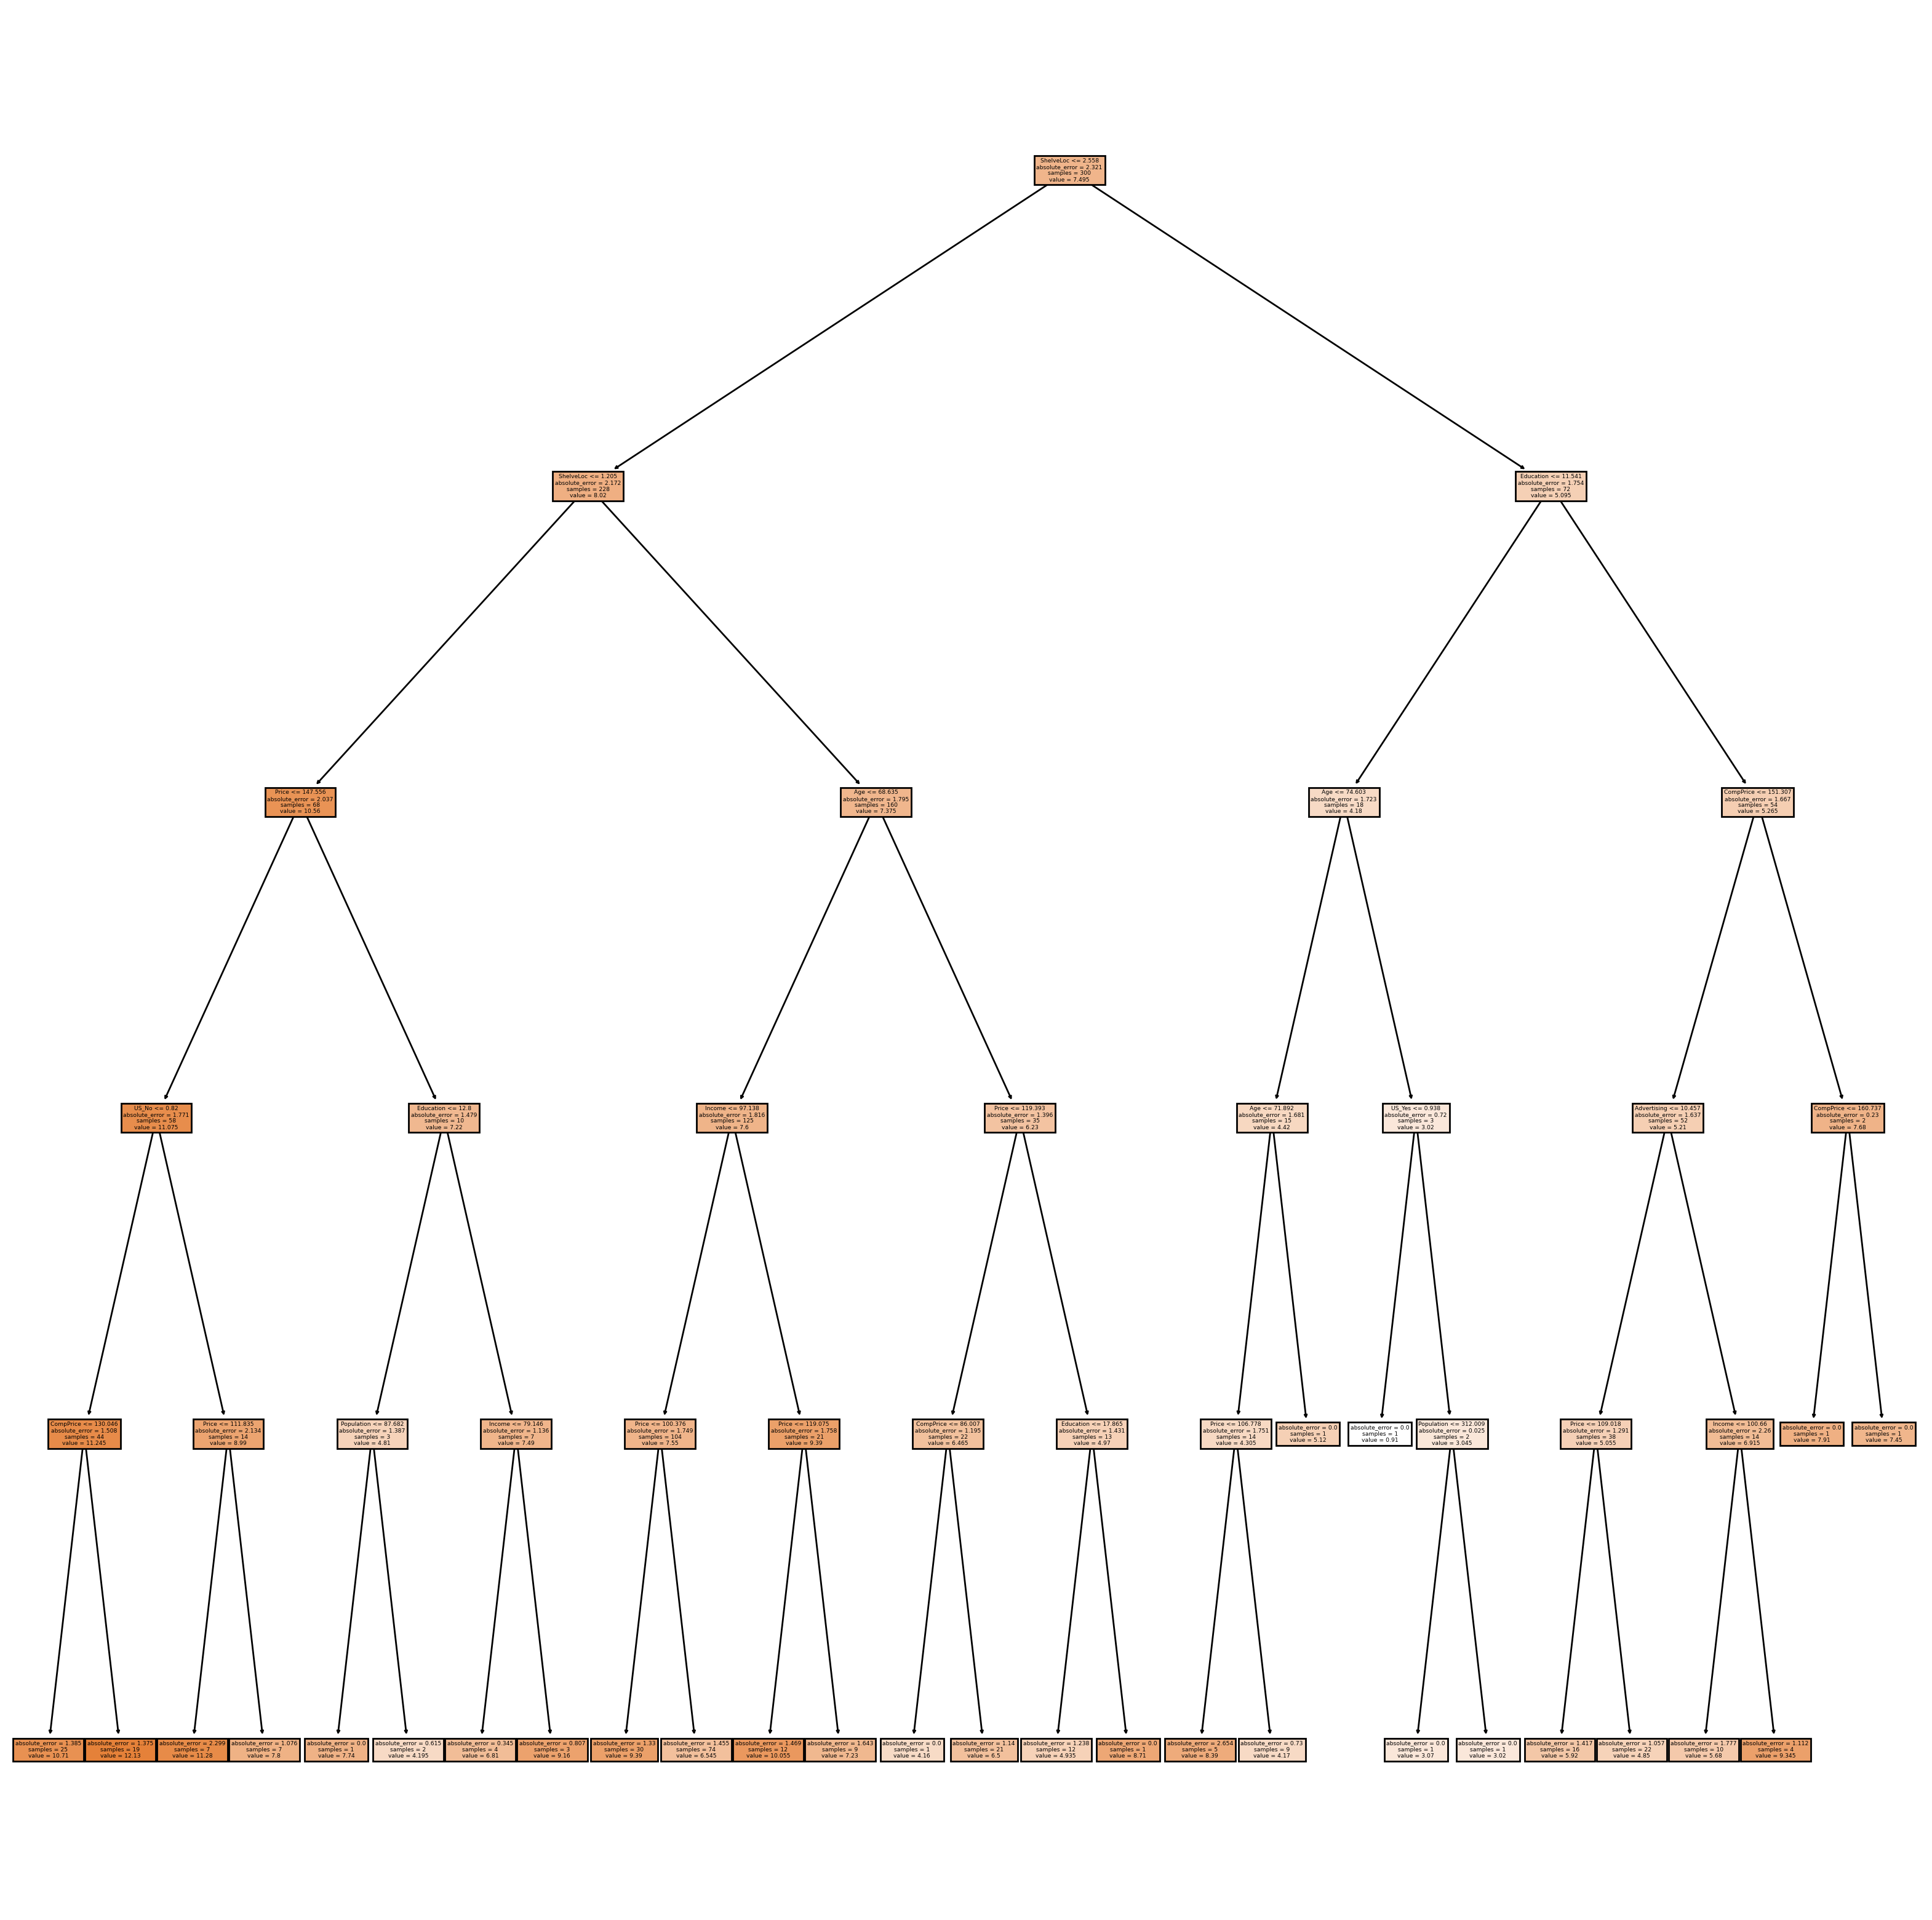

In [120]:
tree.plot_tree(dt,filled=True,feature_names=x.columns)
plt.show()